## Name: Kore Aishwarya Dhananjay
## Roll No. 2447014
## Class: BE(AI&DS)


In [4]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/cf/24/271e77c22724f370c24c705f394b8035b4d27e4c2c6339f3f45ab9b8258e/tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Obtaining dependency information for tensorflow-intel==2.18.0 from https://files.pythonhosted.org/packages/76/ad/fa6c508a15ff79cb5409294c293388e0999b7d480f84b65e4287277434fe/tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7

In [ ]:
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0
#to normalize the pixel values in the training and testing datasets.
#Image data typically has pixel values ranging from 0 to 255. Dividing by 255.0 scales each pixel value to be between 0 and 1.
#Working with smaller values (between 0 and 1 instead of 0 to 255) can reduce computational complexity and improve numerical stability

In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
#sets of images, with dimensions representing the number of images and their pixel layout.

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Label: 5')

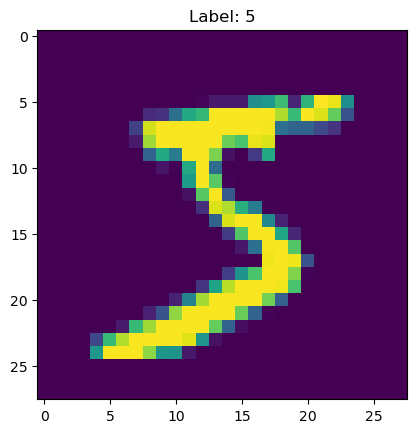

In [6]:
plt.imshow(x_train[0]) 
plt.title(f"Label: {y_train[0]}")

In [7]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
#each image is reshaped from a 2D shape (28, 28) into a 1D shape (784,) (since 28×28=784 28×28=784).

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
#helps ensure that all features contribute equally to the model, avoids giving unintended priority to any feature, and generally improves performance and training efficiency.

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [10]:
model = SVC()
model.fit(x_train, y_train)

SVC()

In [11]:
y_pred = model.predict(x_test)

In [12]:
y_pred[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [13]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

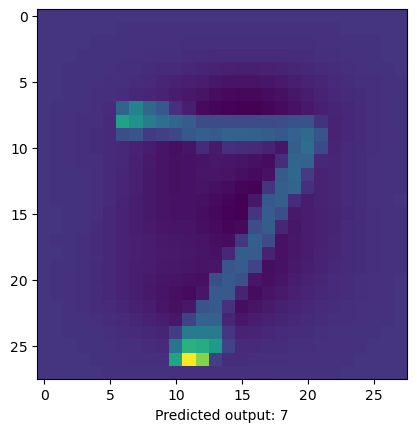

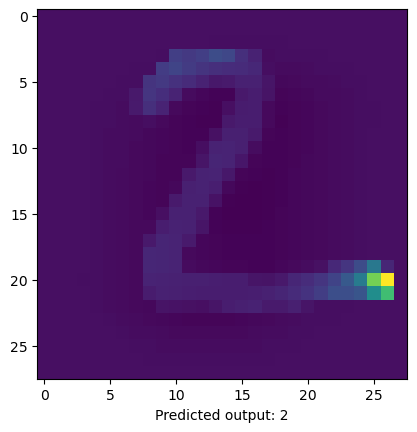

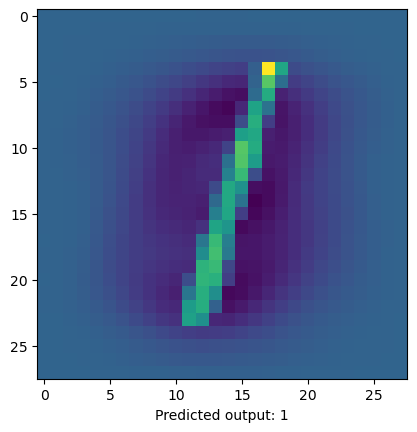

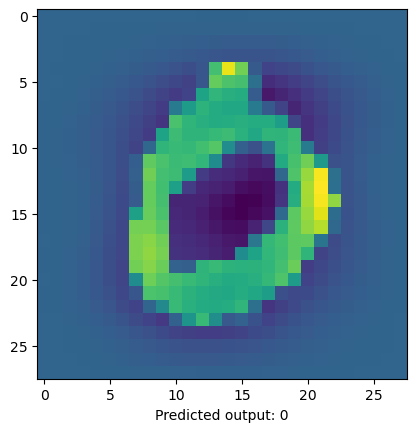

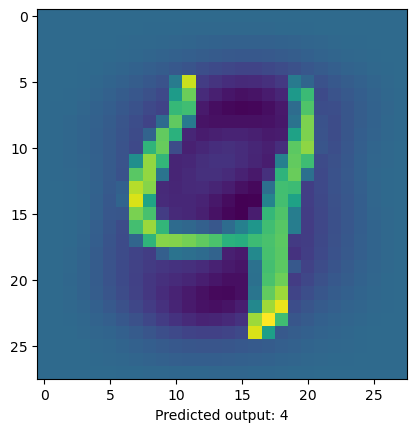

In [14]:
for i in range(5):
    plt.imshow(x_test[i].reshape(28,28))
    plt.xlabel(f"Predicted output: {y_pred[i]}" )
    plt.show()

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)


Test accuracy: 0.9661


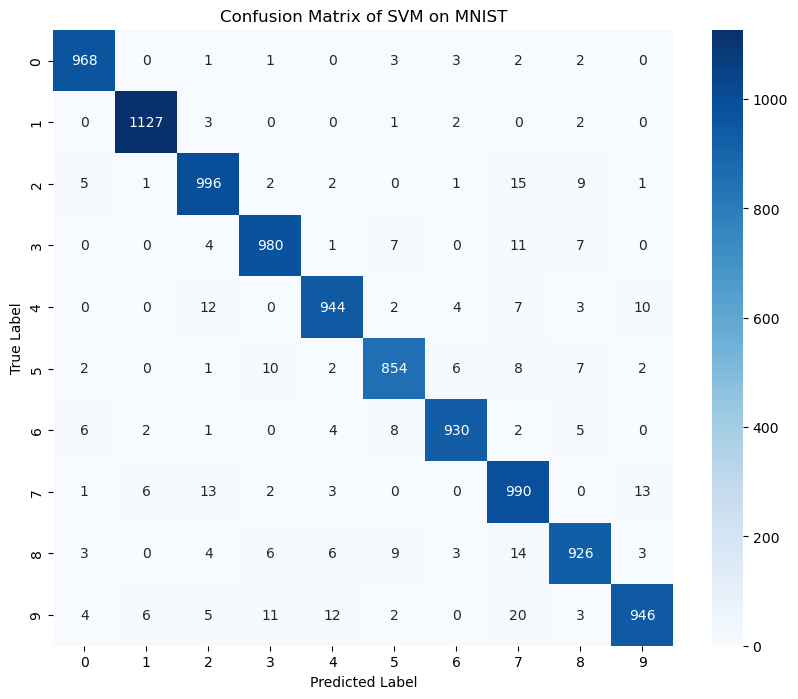

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of SVM on MNIST')
plt.show()


In [ ]:
#